importing libraries and packages 

In [1]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import numpy as np

reading the data for the date from june 2021 to auguest 2021 

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
# 210626,210703,210710, 210717,210724, 210731, 210807, 210814, 210821, 210828        
week_nums = [210605, 210612, 210619,210626,210703,210710, 210717,210724, 210731, 210807, 210814, 210821, 210828]
turnstiles_dataframe  = get_data(week_nums)

In [3]:
turnstiles_dataframe.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,00:00:00,REGULAR,7579078,2590451
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,04:00:00,REGULAR,7579084,2590452
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493


checking the columns of the data frame 

In [4]:
turnstiles_dataframe.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

we can notice an error in EXITS column and since there is an error, i will use strip to remove spaces 

In [5]:
turnstiles_dataframe.columns = [column.strip() for column in turnstiles_dataframe.columns]

check cloumn after strip 

In [6]:
turnstiles_dataframe.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

add cloumns to the data frame. 
1- merge date and time.  
2- convert the dates to week name. 

In [7]:
turnstiles_dataframe['DATE_TIME'] = pd.to_datetime(turnstiles_dataframe['DATE'], cache=True) + pd.to_timedelta(turnstiles_dataframe['TIME'])

In [8]:
turnstiles_dataframe['DATE'] = pd.to_datetime(turnstiles_dataframe['DATE'], cache=True)
turnstiles_dataframe['WEEK_DAY'] = turnstiles_dataframe['DATE'].dt.day_name()

In [9]:
turnstiles_dataframe.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-30,00:00:00,REGULAR,7579078,2590451,2021-05-30 00:00:00,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-30,04:00:00,REGULAR,7579084,2590452,2021-05-30 04:00:00,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-30,08:00:00,REGULAR,7579085,2590454,2021-05-30 08:00:00,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-30,12:00:00,REGULAR,7579093,2590493,2021-05-30 12:00:00,Sunday


now i will only work the regular data and drop any row other than that 

In [10]:
turnstiles_dataframe = turnstiles_dataframe[turnstiles_dataframe.DESC == 'REGULAR']

In [11]:
turnstiles_dataframe.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday


check coulmn desc 

In [54]:
set(turnstiles_dataframe.DESC)

{'REGULAR'}

count number of rows in the data frame 

In [13]:
turnstiles_dataframe.DESC.value_counts()

REGULAR    2710456
Name: DESC, dtype: int64

combine C/A, SCP, UNIT and STATION coloumns and create a new coulmn called Turnstile

In [14]:
turnstiles_dataframe['Turnstile'] = turnstiles_dataframe['C/A'] + turnstiles_dataframe['UNIT'] + turnstiles_dataframe['SCP'] + turnstiles_dataframe['STATION']

here, i calculated the total number of entries, exits, to do that i needed to shift the data first 

In [15]:
grouped_time=turnstiles_dataframe.copy()
grouped_time["PREV_TIME"] = turnstiles_dataframe.groupby(["Turnstile"]).TIME.shift(1)
grouped_time["PREV_ENTRIES"] = turnstiles_dataframe.groupby(["Turnstile"]).ENTRIES.shift(1)
grouped_time["PREV_EXITS"] = turnstiles_dataframe.groupby(["Turnstile"]).EXITS.shift(1)
grouped_time.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY,Turnstile,PREV_TIME,PREV_ENTRIES,PREV_EXITS
209063,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-27,05:00:00,REGULAR,5554,614,2021-08-27 05:00:00,Friday,TRAM2R46900-05-01RIT-ROOSEVELT,01:00:00,5554.0,614.0
209064,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-27,09:00:00,REGULAR,5554,614,2021-08-27 09:00:00,Friday,TRAM2R46900-05-01RIT-ROOSEVELT,05:00:00,5554.0,614.0
209065,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-27,13:00:00,REGULAR,5554,614,2021-08-27 13:00:00,Friday,TRAM2R46900-05-01RIT-ROOSEVELT,09:00:00,5554.0,614.0
209066,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-27,17:00:00,REGULAR,5554,614,2021-08-27 17:00:00,Friday,TRAM2R46900-05-01RIT-ROOSEVELT,13:00:00,5554.0,614.0
209067,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-27,21:00:00,REGULAR,5554,614,2021-08-27 21:00:00,Friday,TRAM2R46900-05-01RIT-ROOSEVELT,17:00:00,5554.0,614.0


drop nulls 

In [16]:
grouped_time.dropna(subset=["PREV_ENTRIES","PREV_EXITS"], axis=0, inplace=True)
grouped_time.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY,Turnstile,PREV_TIME,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday,A002R05102-00-0059 ST,00:00:00,7578734.0,2590325.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday,A002R05102-00-0059 ST,04:00:00,7578740.0,2590327.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday,A002R05102-00-0059 ST,08:00:00,7578749.0,2590340.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday,A002R05102-00-0059 ST,12:00:00,7578789.0,2590386.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,Saturday,A002R05102-00-0059 ST,16:00:00,7578897.0,2590418.0


count number of rows again 

In [17]:
turnstiles_dataframe.DESC.value_counts()

REGULAR    2710456
Name: DESC, dtype: int64

for errors that may occur when calculating number of exits and entries 

In [18]:
def get_daily_counts_exits(row, max_counter):
    counter_ex = row["EXITS"] - row["PREV_EXITS"]
    if counter_ex < 0:
        # Maybe counter is reversed?
        counter_ex = -counter_ex
    if counter_ex > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["EXITS"], row["PREV_EXITS"])
        counter_ex = min(row["EXITS"], row["PREV_EXITS"])
    if counter_ex > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_ex

def get_daily_counts_entries(row, max_counter):
    counter_ent = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter_ent < 0:
        # Maybe counter is reversed?
        counter_ent = -counter_ent
    if counter_ent > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter_ent = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter_ent > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_ent


number of exits and entries 

In [19]:
grouped_time["TOTAL_ENTRIES"] = grouped_time.apply(get_daily_counts_entries, axis=1, max_counter=100000)
grouped_time["TOTAL_EXITS"] = grouped_time.apply(get_daily_counts_exits, axis=1, max_counter=100000)
grouped_time.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,TOTAL_ENTRIES,TOTAL_EXITS
count,2.705439e+06,2.705439e+06,2.705439e+06,2.705439e+06,2.705439e+06,2.705439e+06
mean,4.169867e+07,3.332330e+07,4.169969e+07,3.332418e+07,6.300596e+01,7.186028e+01
std,2.185591e+08,1.920414e+08,2.185613e+08,1.920445e+08,3.430635e+02,3.206158e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.182400e+05,9.989400e+04,2.182305e+05,9.987200e+04,4.000000e+00,6.000000e+00
50%,1.407579e+06,8.575780e+05,1.407623e+06,8.575860e+05,2.700000e+01,3.000000e+01
75%,6.025990e+06,3.972141e+06,6.026183e+06,3.972148e+06,8.400000e+01,8.900000e+01
max,2.147417e+09,2.122890e+09,2.147417e+09,2.122890e+09,9.957700e+04,9.419900e+04


and here for calculating total traffic 

In [20]:
import math
from scipy import stats
grouped_time = grouped_time[(np.abs(stats.zscore(grouped_time["TOTAL_ENTRIES"])) < 3)] #filtering
grouped_time = grouped_time[(np.abs(stats.zscore(grouped_time["TOTAL_EXITS"])) < 3)] #filtering
grouped_time["TOTAL_TRAFFIC"] = grouped_time["TOTAL_EXITS"] + grouped_time["TOTAL_ENTRIES"]
grouped_time.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY,Turnstile,PREV_TIME,PREV_ENTRIES,PREV_EXITS,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday,A002R05102-00-0059 ST,00:00:00,7578734.0,2590325.0,6.0,2.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday,A002R05102-00-0059 ST,04:00:00,7578740.0,2590327.0,9.0,13.0,22.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday,A002R05102-00-0059 ST,08:00:00,7578749.0,2590340.0,40.0,46.0,86.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday,A002R05102-00-0059 ST,12:00:00,7578789.0,2590386.0,108.0,32.0,140.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,Saturday,A002R05102-00-0059 ST,16:00:00,7578897.0,2590418.0,124.0,21.0,145.0


i did a mask to only filter data that are in weekends 

In [21]:
#mask = grouped_time[(grouped_time["STATION"] == "1 AV")]
#mask = ((grouped_time["WEEK_DAY"] == "Saturday")&
#(grouped_time["WEEK_DAY"] == "Sunday"))
#grouped_time[mask].tail()
mask = grouped_time.loc[grouped_time["WEEK_DAY"].isin(["Saturday","Sunday"])]
mask 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY,Turnstile,PREV_TIME,PREV_ENTRIES,PREV_EXITS,TOTAL_ENTRIES,TOTAL_EXITS,TOTAL_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,Saturday,A002R05102-00-0059 ST,00:00:00,7578734.0,2590325.0,6.0,2.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,Saturday,A002R05102-00-0059 ST,04:00:00,7578740.0,2590327.0,9.0,13.0,22.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,Saturday,A002R05102-00-0059 ST,08:00:00,7578749.0,2590340.0,40.0,46.0,86.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,Saturday,A002R05102-00-0059 ST,12:00:00,7578789.0,2590386.0,108.0,32.0,140.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-29,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,Saturday,A002R05102-00-0059 ST,16:00:00,7578897.0,2590418.0,124.0,21.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209033,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-22,05:00:00,REGULAR,5554,613,2021-08-22 05:00:00,Sunday,TRAM2R46900-05-01RIT-ROOSEVELT,01:00:00,5554.0,613.0,0.0,0.0,0.0
209034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-22,09:00:00,REGULAR,5554,613,2021-08-22 09:00:00,Sunday,TRAM2R46900-05-01RIT-ROOSEVELT,05:00:00,5554.0,613.0,0.0,0.0,0.0
209035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-22,13:00:00,REGULAR,5554,613,2021-08-22 13:00:00,Sunday,TRAM2R46900-05-01RIT-ROOSEVELT,09:00:00,5554.0,613.0,0.0,0.0,0.0
209036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-08-22,17:00:00,REGULAR,5554,613,2021-08-22 17:00:00,Sunday,TRAM2R46900-05-01RIT-ROOSEVELT,13:00:00,5554.0,613.0,0.0,0.0,0.0


here i grouped the data to get the total number of traffic for each station and sorted the result and found top 10 crowded stations 

In [22]:
#grouped_time[grouped_time.TOTAL_ENTRIES==0]

In [23]:
##station_daily = grouped_time.groupby(["STATION"])[['TOTAL_TRAFFIC']].sum().reset_index()
#station_daily.head(1000) 
df= (mask
 .groupby(["STATION"])
 .TOTAL_TRAFFIC.sum()
 .reset_index()
 .sort_values("TOTAL_TRAFFIC", ascending=False)).head(10)
df

,STATION,TOTAL_TRAFFIC
61,34 ST-PENN STA,1907448.0
59,34 ST-HERALD SQ,1349315.0
14,14 ST-UNION SQ,1283116.0
68,42 ST-PORT AUTH,1206415.0
233,GRD CNTRL-42 ST,1188644.0
9,125 ST,1187991.0
353,TIMES SQ-42 ST,1181966.0
110,86 ST,1150356.0
46,23 ST,1113537.0
173,CANAL ST,997556.0


plotting the table 

Text(0.5, 1.0, 'total traffic for top 10 stations')

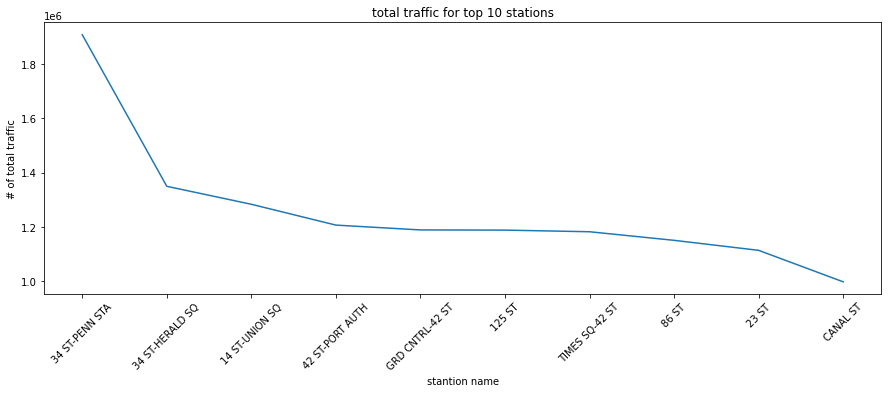

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df['STATION'], df['TOTAL_TRAFFIC'])
plt.ylabel('# of total traffic')
plt.xlabel('stantion name')
plt.xticks(rotation=45)
plt.title('total traffic for top 10 stations')

In [28]:
#data_pandas_series = pd.Series(df['STATION'],df['WEEK_DAY'])
#plt.plot(data_pandas_series)
#ticks_x = df['WEEK_DAY']
#months = df['STATION'] 
#plt.plot(ticks_x, months, fontsize = '20', family = 'fantasy',color='orange');
#plt.plot(df['STATION'] ,df['WEEK_DAY']);

here i checked the differences between the total traffic in sunday and monday 

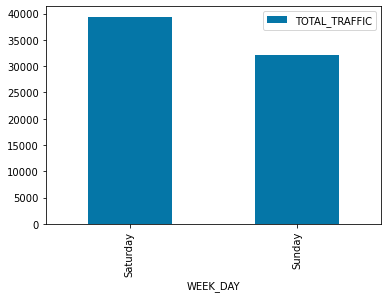

In [29]:
Total_Weekly_ridership = mask.groupby(['WEEK_DAY']).TOTAL_TRAFFIC.sum().reset_index()
Total_Weekly_ridership.columns = ['WEEK_DAY','TOTAL_TRAFFIC']
days = ['Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = Total_Weekly_ridership['WEEK_DAY'].map(mapping)
Total_Weekly_ridership = Total_Weekly_ridership.iloc[key.argsort()].set_index('WEEK_DAY')
#sanity check
##list(Total_Weekly_ridership.columns)
my_colors = ['#0576A7','#0576A7']
Total_Weekly_ridership['TOTAL_TRAFFIC'] = Total_Weekly_ridership['TOTAL_TRAFFIC']//1000
Total_Weekly_ridership.plot(kind = 'bar',color = my_colors);